In [5]:
from sqlalchemy import create_engine
import pandas as pd
from getpass import getpass  # To get the password without showing the input

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#sns.set_theme(style="whitegrid")

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#1 read the file 

In [6]:
customer_df = pd.read_csv('Data_cleaning_py_01_04_23(1).csv')
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02/03/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,02/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,02/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,02/06/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,02/03/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
#2 customer id is in this case a record number, that should not be taken into account for the dataframe analysis in order to generat the regression model

Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
numerical_df = customer_df.select_dtypes()
categorical_df = customer_df.select_dtypes()

In [7]:
numerical_df = customer_df.select_dtypes(include=np.number)
numerical_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [8]:
category_df = customer_df.select_dtypes(exclude=np.number)
category_df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,02/03/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,02/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,02/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,02/06/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,02/03/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

In [13]:
for col in category_df:
    print(col)

Customer
State
Response
Coverage
Education
Effective To Date
EmploymentStatus
Gender
Location Code
Marital Status
Policy Type
Policy
Renew Offer Type
Sales Channel
Vehicle Class
Vehicle Size


<AxesSubplot:>

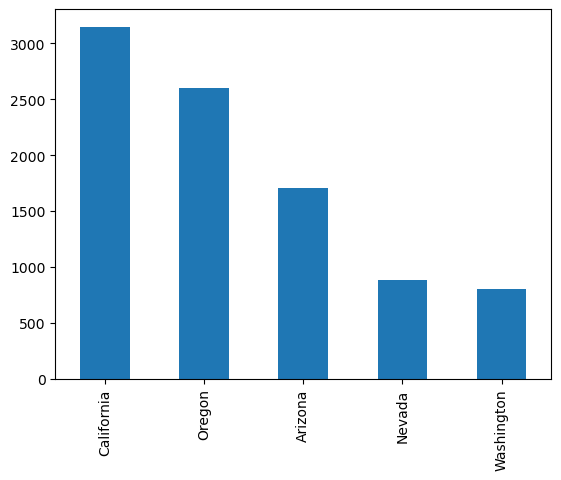

In [10]:
category_df['State'].value_counts().plot(kind='bar')

<AxesSubplot:>

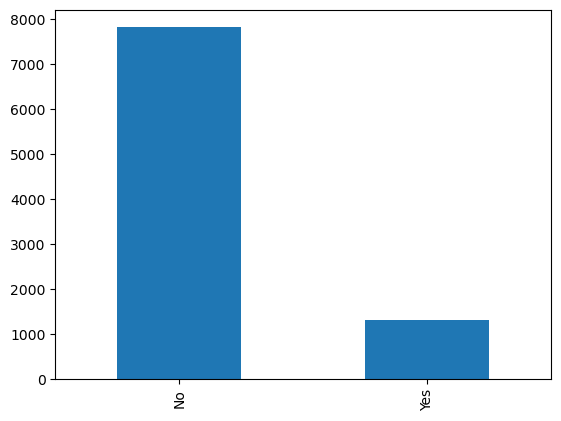

In [11]:
category_df['Response'].value_counts().plot(kind='bar')

<AxesSubplot:>

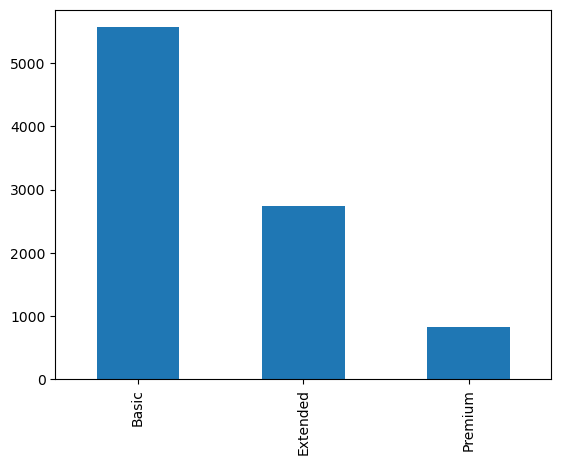

In [14]:
category_df['Coverage'].value_counts().plot(kind='bar')

<AxesSubplot:>

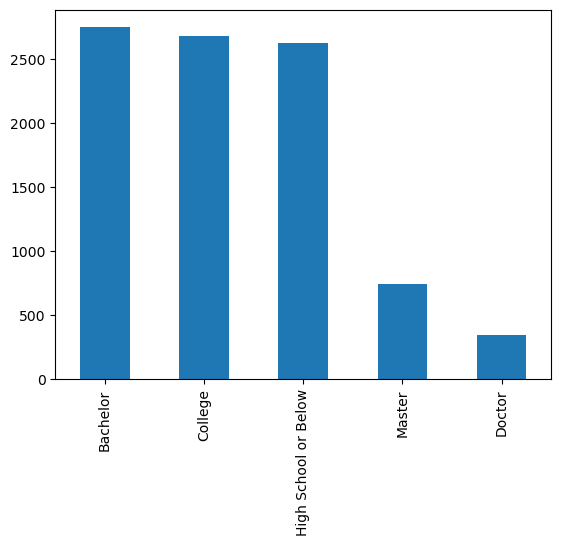

In [15]:
category_df['Education'].value_counts().plot(kind='bar')

<AxesSubplot:>

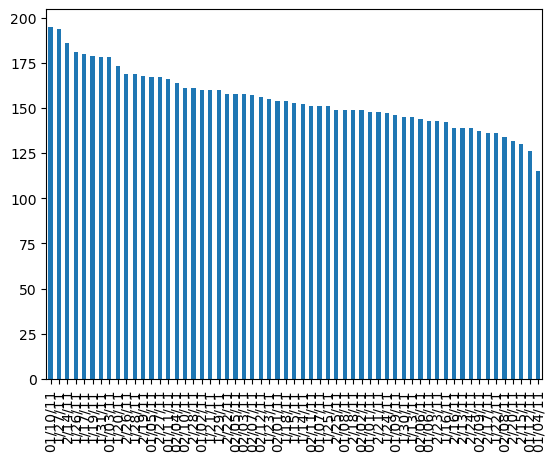

In [16]:
category_df['Effective To Date'].value_counts().plot(kind='bar')

<AxesSubplot:>

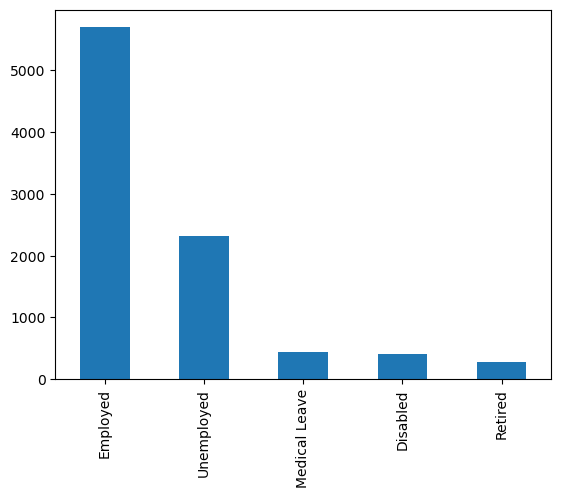

In [17]:
category_df['EmploymentStatus'].value_counts().plot(kind='bar')

<AxesSubplot:>

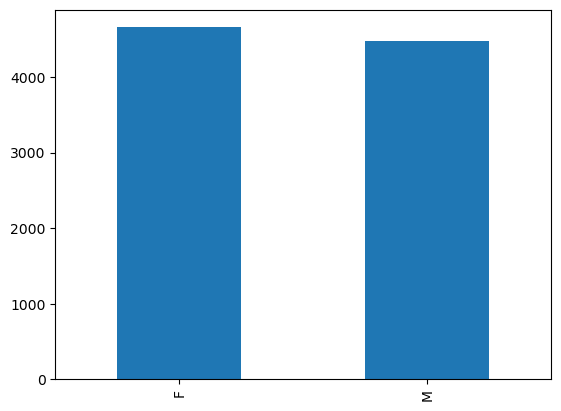

In [19]:
category_df['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

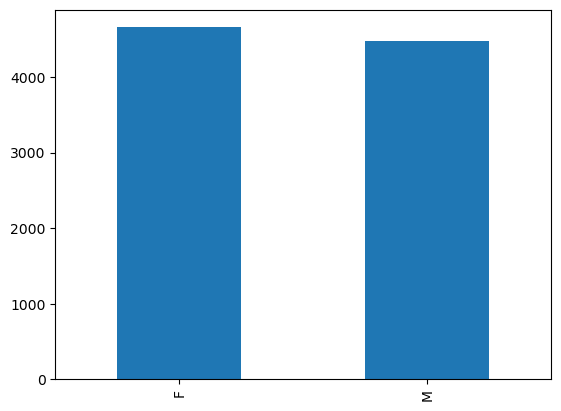

In [20]:
category_df['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

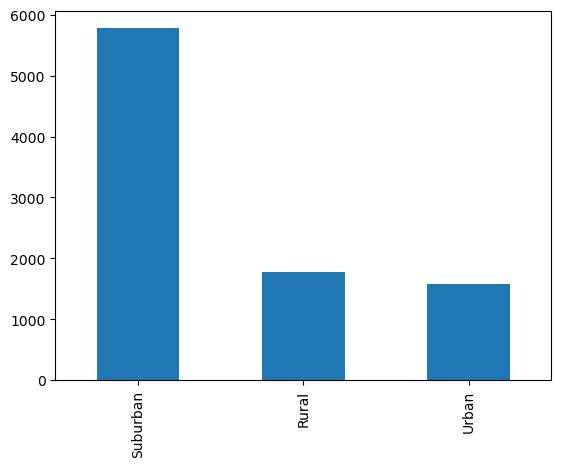

In [21]:
category_df['Location Code'].value_counts().plot(kind='bar')

<AxesSubplot:>

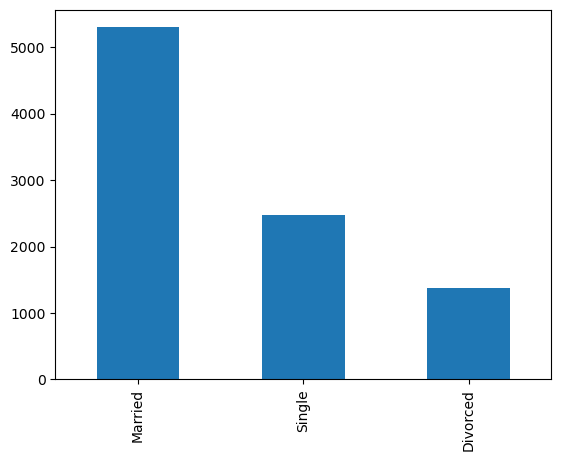

In [22]:
category_df['Marital Status'].value_counts().plot(kind='bar')

<AxesSubplot:>

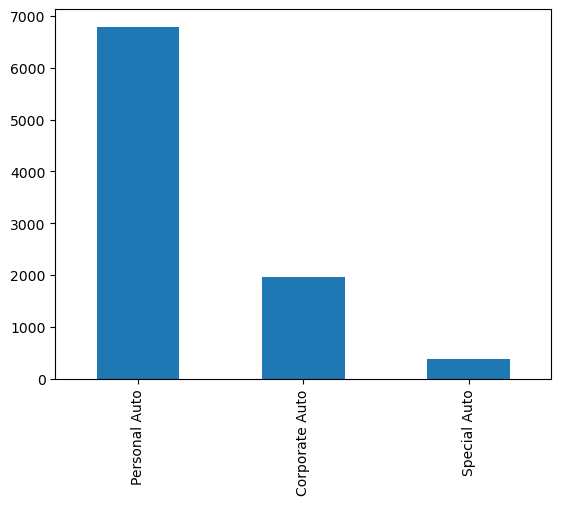

In [23]:
category_df['Policy Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

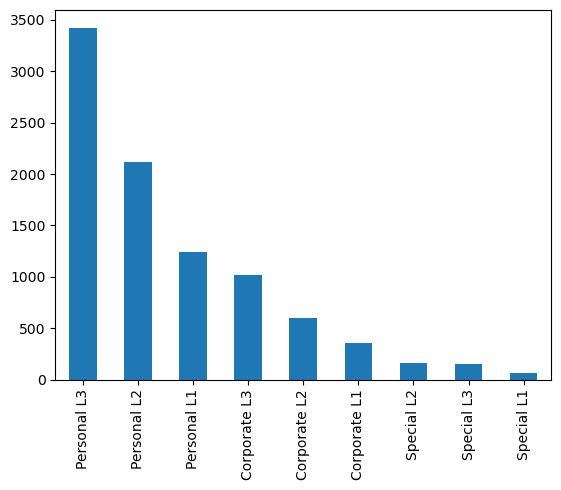

In [24]:
category_df['Policy'].value_counts().plot(kind='bar')

<AxesSubplot:>

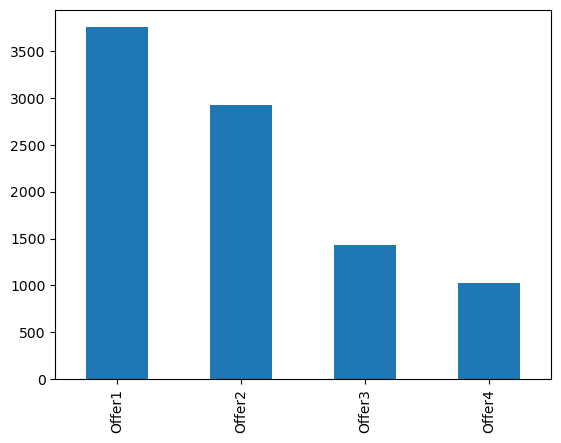

In [25]:
category_df['Renew Offer Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

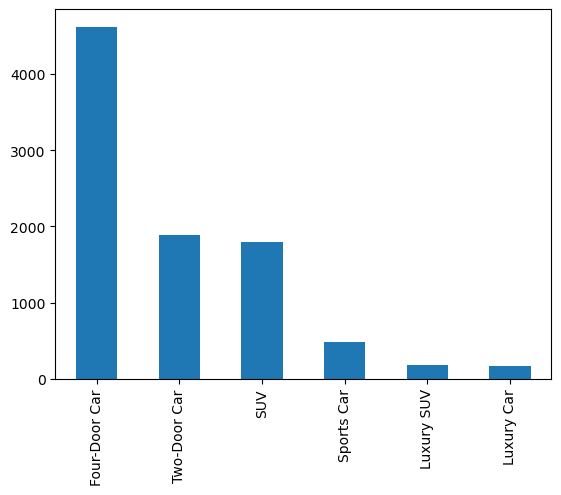

In [26]:
category_df['Vehicle Class'].value_counts().plot(kind='bar')

<AxesSubplot:>

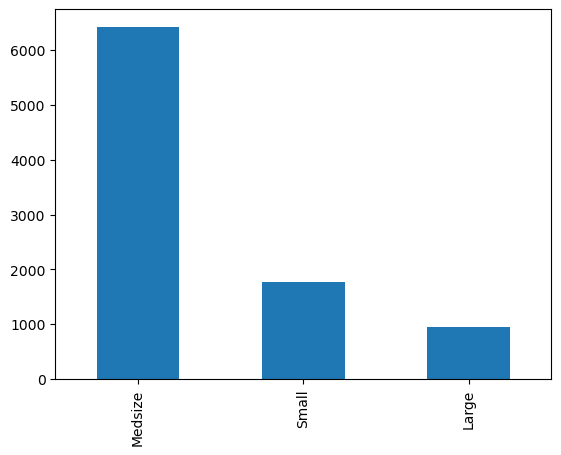

In [28]:
category_df['Vehicle Size'].value_counts().plot(kind='bar')

For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [32]:
check_nan = category_df.isnull().values.any()
check_nan

False

In [33]:
check_nan = numerical_df.isnull().values.any()
check_nan

False

In [ ]:
#as per the checks that we have performed, we see that there are no "null values"